In [11]:
import uproot
import awkward as ak
import sys
sys.path.append("/home/etl/Test_Stand/ETL_TestingDAQ/")

from binary_decoders import lecroy

import matplotlib.pyplot as plt

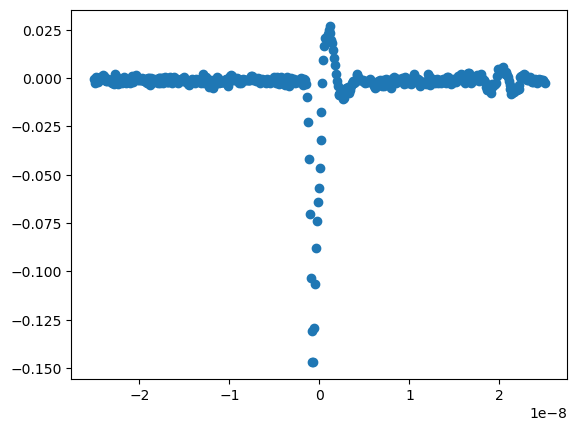

In [83]:
import importlib

importlib.reload(lecroy)

C1 = lecroy.ScopeData("/home/etl/Test_Stand/ETL_TestingDAQ/unit_test/input_data/run_5100/C1--Trace5100.trc")
C2 = lecroy.ScopeData("/home/etl/Test_Stand/ETL_TestingDAQ/unit_test/input_data/run_5100/C2--Trace5100.trc") # TRIGGER
C3 = lecroy.ScopeData("/home/etl/Test_Stand/ETL_TestingDAQ/unit_test/input_data/run_5100/C3--Trace5100.trc") # CLOCK
C4 = lecroy.ScopeData("/home/etl/Test_Stand/ETL_TestingDAQ/unit_test/input_data/run_5100/C4--Trace5100.trc")

C = C2
points_per_frame = int(C.waveArrayCount / C.sequenceSegments)
x = C.x.reshape(-1, points_per_frame)
y = C.y.reshape(-1, points_per_frame)

plt.scatter(x[0], y[0])

In [55]:
import awkward as ak


t = C.x.reshape(-1, points_per_frame)
v = C.y.reshape(-1, points_per_frame)



array = ak.Array({
    'i_evt': [i for i in range(len(t))],
    'seconds': t,
    'volts': v 
})

output_path = "/home/etl/Test_Stand/tbanalysis/investigations/root_dumper/test.root"
with uproot.recreate(output_path) as file:
    file["pulse"] = array


In [61]:
old = uproot.open(
    "converted_run5100.root"
)["pulse"].arrays()

new = uproot.open("test.root")["pulse"].arrays()

print(new.i_evt)
print(new.type.show())

80000
5000 * {
    i_evt: uint32,
    segment_time: float32,
    channel: 4 * 502 * float32,
    time: 1 * 502 * float32,
    timeoffsets: 8 * float32
}
None
[0, 0.00131, 0.00184, 0.00288, 0.0034, 0.00393, ..., 14, 14, 14, 14, 14, 14]
[0, 1, 2, 3, 4, 5, 6, 7, 8, ..., 4992, 4993, 4994, 4995, 4996, 4997, 4998, 4999]
5000 * {
    i_evt: int64,
    seconds: 502 * float64,
    volts: 502 * float32
}
None


In [88]:
# segment_time2, horizontal_offset2 = C2.get_segment_times_from_data()
# segment_time3, horizontal_offset3 = C3.get_segment_times_from_data()

# time_offset = horizontal_offset3 - horizontal_offset2
# print(time_offset)

trig_times2, horz_offsets2 = C2.get_segment_times()
trig_times3, horz_offsets3 = C3.get_segment_times()

import numpy as np
a = np.array(horz_offsets3) - np.array(horz_offsets2)
print(a)

print(old.timeoffsets)

[2.e-12 2.e-12 2.e-12 ... 2.e-12 2.e-12 2.e-12]
[[0, 1.4e-11, 1.6e-11, 2.5e-11, 0, 0, 0, 0], ..., [0, 1.4e-11, ..., 0, 0]]
